<a href="https://colab.research.google.com/github/okech-glitch/python/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the Dataset

In [2]:
# Import necessary libraries
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv('mall_customers.csv')

# Display the first few rows of the dataset
df.head()


Saving mall_customers.csv to mall_customers.csv


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploring the Dataset

In [3]:
# Check for missing values
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [4]:
# Check for missing values again
print("Missing values in each column:")
print(df.isnull().sum())

# If there are missing values, you can drop them like this:
df = df.dropna()


Missing values in each column:
CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [5]:
# Encoding the 'Genre' column
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


Feature Scaling


In [6]:
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
scaled_df.head()


,Age,Annual_Income_(k$),Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Exploratory Data Analysis (EDA)

In [7]:
# Correlation matrix
correlation_matrix = features.corr()
print(correlation_matrix)


                         Age  Annual_Income_(k$)  Spending_Score
Age                 1.000000           -0.012398       -0.327227
Annual_Income_(k$) -0.012398            1.000000        0.009903
Spending_Score     -0.327227            0.009903        1.000000


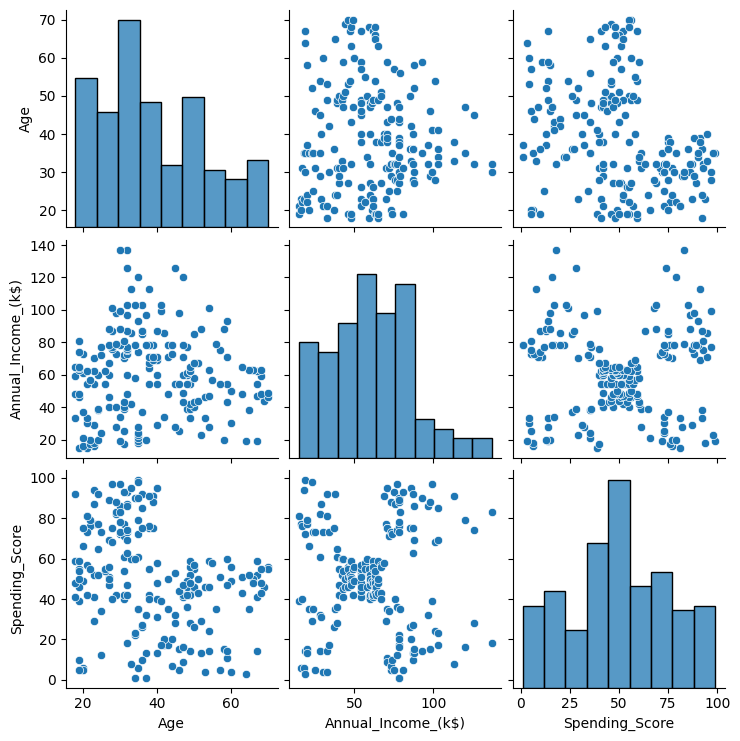

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(features)
plt.show()


Choosing the Right Number of Clusters:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

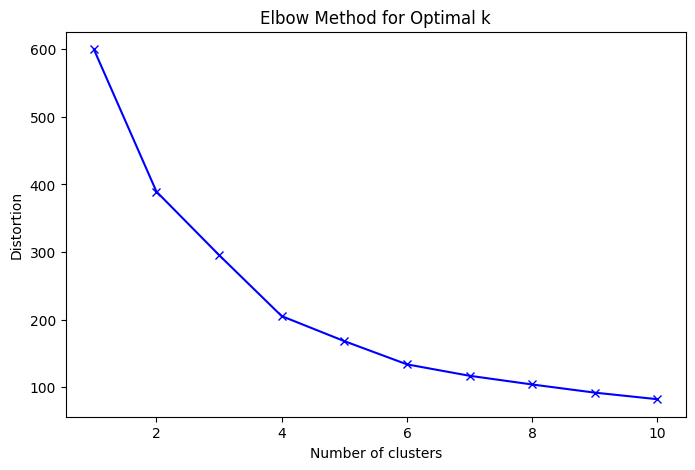

In [9]:
from sklearn.cluster import KMeans

# Compute distortions
distortions = []
K = range(1, 11)
for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(scaled_features)
    distortions.append(kmean_model.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


Silhouette Score

In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, kmean_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.40244337157286664


Apply K-Means Clustering

In [12]:
# Apply K-Means with an optimal number of clusters (e.g., 5)
optimal_k = 5  # Set based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")


Silhouette Score for K-Means: 0.41664341513732767


 Explore Alternative Clustering Algorithms

In [14]:
from sklearn.cluster import DBSCAN  # Import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Calculate Silhouette Score (DBSCAN might have noise points, so it might not always be available)
if len(set(dbscan_labels)) > 1:  # Check if more than one cluster
    silhouette_avg_dbscan = silhouette_score(scaled_features, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN did not find any clusters.")

Silhouette Score for DBSCAN: 0.18451372756506046


Hierarchical Clustering



In [16]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering # Import the AgglomerativeClustering class
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# Calculate Silhouette Score
silhouette_avg_hierarchical = silhouette_score(scaled_features, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.39002826186267214


Train the Final K-Means Model

In [18]:
optimal_k = 5  # Set this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)


Cluster Profiles

In [19]:
df['Cluster'] = kmeans_labels
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles)


         CustomerID     Genre        Age  Annual_Income_(k$)  Spending_Score
Cluster                                                                     
0         83.872340  0.574468  55.638298           54.382979       48.851064
1        159.743590  0.487179  39.871795           86.102564       19.358974
2        161.025000  0.550000  32.875000           86.100000       81.525000
3         24.100000  0.600000  46.250000           26.750000       18.350000
4         55.648148  0.592593  25.185185           41.092593       62.240741


Visualization

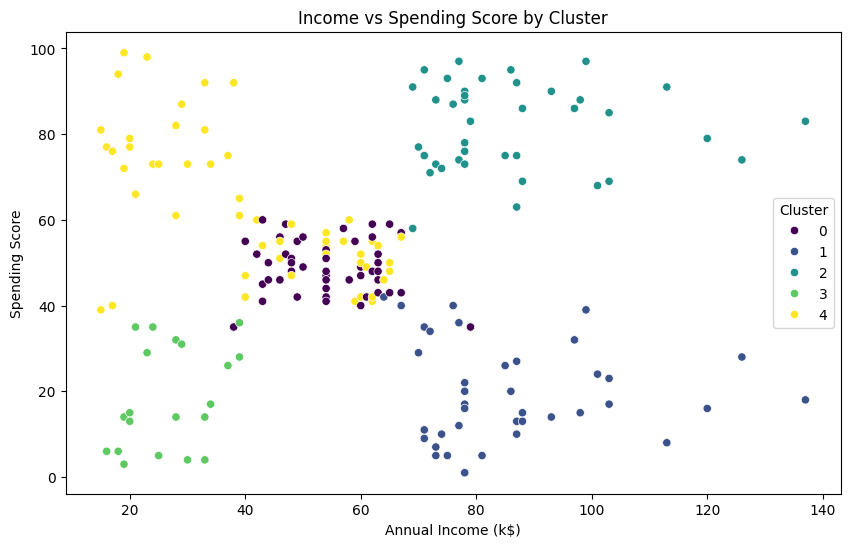

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual_Income_(k$)'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.title('Income vs Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


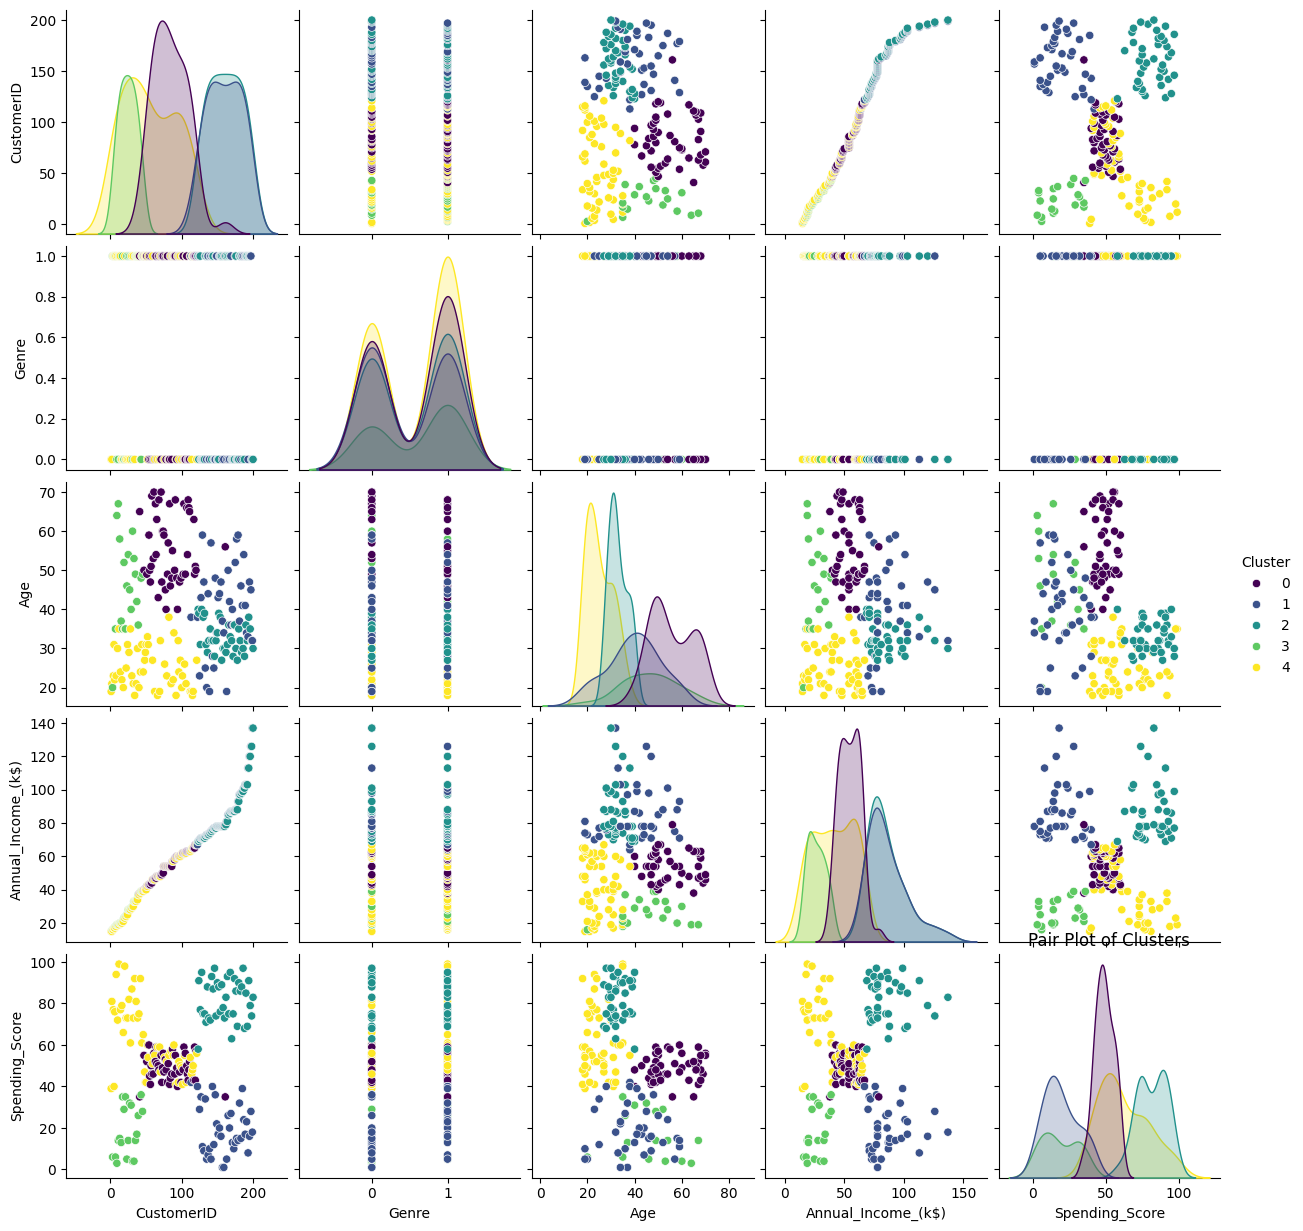

In [21]:
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.title('Pair Plot of Clusters')
plt.show()


Deployment


In [23]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [29]:
import joblib

# Save the K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [30]:
import joblib

# Load the K-Means model
kmeans = joblib.load('kmeans_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')


In [31]:
# Example: Transform new data and predict cluster labels
new_data = pd.DataFrame({
    'Age': [35],
    'Annual_Income_(k$)': [70],
    'Spending_Score': [60]
})

# Scale the new data
scaled_new_data = scaler.transform(new_data)

# Predict cluster labels
cluster_labels = kmeans.predict(scaled_new_data)
print(f'Cluster Labels: {cluster_labels}')


Cluster Labels: [2]


In [32]:
import pandas as pd
import joblib

# Example new data
new_data = pd.DataFrame({
    'Age': [29, 45, 37],
    'Annual_Income_(k$)': [70, 55, 60],
    'Spending_Score': [65, 40, 50]
})

# Load the scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Scale the new data
scaled_new_data = scaler.transform(new_data)

# Predict cluster labels
cluster_labels = kmeans.predict(scaled_new_data)

# Add cluster labels to the new data
new_data['Cluster'] = cluster_labels

print(new_data)


   Age  Annual_Income_(k$)  Spending_Score  Cluster
0   29                  70              65        2
1   45                  55              40        0
2   37                  60              50        4
